In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

import sidetable
#df.stb.freq(['City'], style=True)

In [2]:
df= pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
# One hot encoding
df['State']=df['State'].astype('category')
df['State']=df['State'].cat.codes
df= pd.get_dummies(df, columns=['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [9]:
df=df.iloc[:,0:-1]
df

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


## Preprocession steps

|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

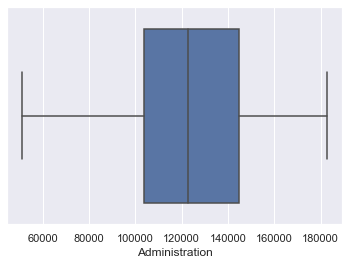

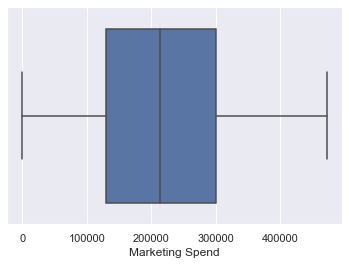

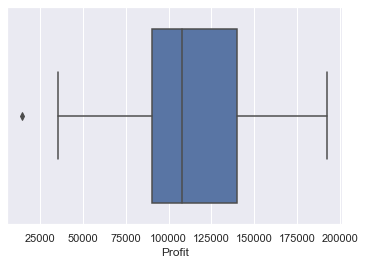

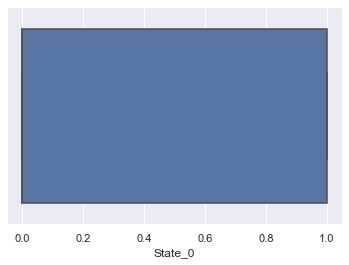

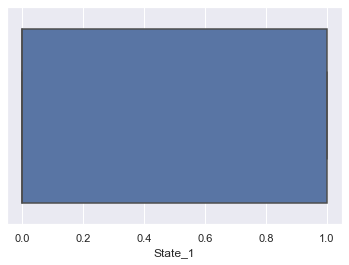

In [11]:
# Check outliers
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    boxplot(i)

No outlier detected.

<AxesSubplot:xlabel='Profit', ylabel='Density'>

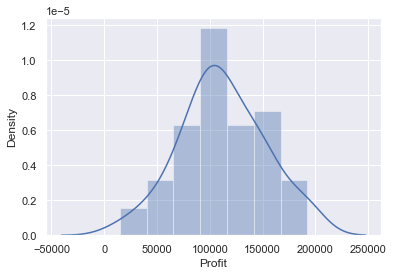

In [13]:
# Check for normal distribution 
sns.distplot(df['Profit'])

Dependent variable is normally distributed.

<AxesSubplot:>

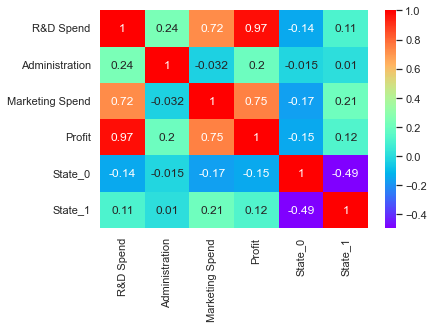

In [15]:
#Check multi collinearity
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

No multi collinearity.

In [12]:
# Split data into x and y
x= df.drop(['Profit'], axis=1)
y= df['Profit']

In [16]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

## Decision tree 

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [20]:
y_pred_train= dt.predict(x_train)
y_pred_test= dt.predict(x_test)

In [22]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

1.0
0.8933839009915935


## Random forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_train_rf= rf.predict(x_train)
y_pred_test_rf= rf.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train_rf))
print(r2_score(y_test, y_pred_test_rf))

0.9854024408152142
0.9483963455164298


## Linear regression

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred_train_lr= lr.predict(x_train)
y_pred_test_lr= lr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train_lr))
print(r2_score(y_test, y_pred_test_lr))

0.942446542689397
0.9649618042060317


## K-fold CV

In [29]:
from sklearn.model_selection import cross_val_score
accuracy= cross_val_score(rf, x_test, y_test, cv=10)
accuracy

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])